In [31]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from math import sqrt

In [32]:

data = pd.read_csv('BA.L.csv', date_parser = True)
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
8088,04/02/2020,646.000000,649.599976,642.700012,648.200012,648.200012,5702726
8089,05/02/2020,647.400024,652.302979,642.799988,646.000000,646.000000,9308103
8090,06/02/2020,648.799988,654.200012,645.599976,652.799988,652.799988,4636089
8091,07/02/2020,652.000000,655.799988,649.099976,655.000000,655.000000,5301121
8092,10/02/2020,655.000000,657.400024,647.000000,648.599976,648.599976,9487551


In [33]:
data_training = data[:5600]
data_test = data[5600:]

In [34]:

data_training = data_training.drop(['Date', 'Adj Close'], axis = 1)

In [35]:

scaler = MinMaxScaler()
data_training = scaler.fit_transform(data_training)
data_training

array([[0.16641138, 0.16334521, 0.16959486, 0.16641138, 0.        ],
       [0.16641138, 0.16334521, 0.16959486, 0.16641138, 0.        ],
       [0.16916323, 0.16604635, 0.17239935, 0.16916323, 0.        ],
       ...,
       [0.68295623, 0.67295213, 0.6933431 , 0.68370707, 0.00523608],
       [0.68727356, 0.67571591, 0.6941083 , 0.68295623, 0.00510149],
       [0.67938974, 0.67166234, 0.68856055, 0.68370707, 0.00463764]])

In [36]:
data_training[0:10]

array([[0.16641138, 0.16334521, 0.16959486, 0.16641138, 0.        ],
       [0.16641138, 0.16334521, 0.16959486, 0.16641138, 0.        ],
       [0.16916323, 0.16604635, 0.17239935, 0.16916323, 0.        ],
       [0.1659515 , 0.1628938 , 0.16912618, 0.1659515 , 0.        ],
       [0.16274163, 0.15974307, 0.1658549 , 0.16274163, 0.        ],
       [0.18154652, 0.17820148, 0.18501954, 0.18154652, 0.        ],
       [0.19117983, 0.1876573 , 0.19483714, 0.19117983, 0.        ],
       [0.19026193, 0.18675631, 0.19390168, 0.19026193, 0.        ],
       [0.19255576, 0.18900787, 0.19623939, 0.19255576, 0.        ],
       [0.19255576, 0.18900787, 0.19623939, 0.19255576, 0.        ]])

In [37]:

X_train = []
y_train = []

In [38]:
for i in range(30, data_training.shape[0]):
    X_train.append(data_training[i-30:i])
    y_train.append(data_training[i, 0])

In [39]:
X_train, y_train = np.array(X_train), np.array(y_train)

In [40]:

X_train.shape

(5570, 30, 5)

In [41]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

In [42]:

model = Sequential()
model.add(LSTM(units = 30, activation = 'relu', return_sequences = True, input_shape = (X_train.shape[1], 5)))
model.add(LSTM(30, activation='relu'))
model.add(Dense(1))


In [43]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 30, 30)            4320      
_________________________________________________________________
lstm_5 (LSTM)                (None, 30)                7320      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 31        
Total params: 11,671
Trainable params: 11,671
Non-trainable params: 0
_________________________________________________________________


In [44]:

model.compile(optimizer='adam', loss = 'mean_squared_error')

In [45]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32,validation_split=0.1)

Train on 5013 samples, validate on 557 samples
Epoch 1/50
5013/5013 [==============================] - 43s 9ms/sample - loss: 0.0128 - val_loss: 0.0012
Epoch 2/50
5013/5013 [==============================] - 36s 7ms/sample - loss: 0.0019 - val_loss: 0.0011
Epoch 3/50
5013/5013 [==============================] - 21s 4ms/sample - loss: 0.0018 - val_loss: 7.8507e-04
Epoch 4/50
5013/5013 [==============================] - 18s 4ms/sample - loss: 0.0018 - val_loss: 0.0010
Epoch 5/50
5013/5013 [==============================] - 17s 3ms/sample - loss: 0.0018 - val_loss: 7.2920e-04
Epoch 6/50
5013/5013 [==============================] - 17s 3ms/sample - loss: 0.0017 - val_loss: 8.8313e-04
Epoch 7/50
5013/5013 [==============================] - 17s 3ms/sample - loss: 0.0017 - val_loss: 8.1987e-04
Epoch 8/50
5013/5013 [==============================] - 17s 3ms/sample - loss: 0.0017 - val_loss: 6.5355e-04
Epoch 9/50
5013/5013 [==============================] - 17s 3ms/sample - loss: 0.0017 - val_l

In [47]:
data_test.head()

,Date,Open,High,Low,Close,Adj Close,Volume
5600,19/03/2010,378.399994,386.700012,376.500000,385.700012,242.767395,20143437
5601,22/03/2010,385.000000,389.399994,383.000000,388.799988,244.718552,8933820
5602,23/03/2010,386.000000,389.899994,377.700012,380.200012,239.305557,14340522
5603,24/03/2010,381.700012,384.100006,379.200012,379.200012,238.676163,13273310
5604,25/03/2010,379.899994,382.200012,378.799988,381.000000,239.809113,10670263


In [48]:
data_training


array([[0.16641138, 0.16334521, 0.16959486, 0.16641138, 0.        ],
       [0.16641138, 0.16334521, 0.16959486, 0.16641138, 0.        ],
       [0.16916323, 0.16604635, 0.17239935, 0.16916323, 0.        ],
       ...,
       [0.68295623, 0.67295213, 0.6933431 , 0.68370707, 0.00523608],
       [0.68727356, 0.67571591, 0.6941083 , 0.68295623, 0.00510149],
       [0.67938974, 0.67166234, 0.68856055, 0.68370707, 0.00463764]])

In [49]:
data_test.head()

,Date,Open,High,Low,Close,Adj Close,Volume
5600,19/03/2010,378.399994,386.700012,376.500000,385.700012,242.767395,20143437
5601,22/03/2010,385.000000,389.399994,383.000000,388.799988,244.718552,8933820
5602,23/03/2010,386.000000,389.899994,377.700012,380.200012,239.305557,14340522
5603,24/03/2010,381.700012,384.100006,379.200012,379.200012,238.676163,13273310
5604,25/03/2010,379.899994,382.200012,378.799988,381.000000,239.809113,10670263


In [50]:



data_test.tail(30)

,Date,Open,High,Low,Close,Adj Close,Volume
8063,30/12/2019,575.000000,577.950012,565.400024,566.799988,566.799988,3559330
8064,31/12/2019,564.799988,569.400024,558.599976,564.799988,564.799988,1696228
8065,02/01/2020,568.599976,575.000000,566.799988,574.000000,574.000000,4242034
8066,03/01/2020,567.599976,582.400024,566.059998,580.799988,580.799988,4551941
8067,06/01/2020,578.200012,595.599976,578.200012,588.599976,588.599976,6469303
8068,07/01/2020,598.200012,601.200012,586.460022,590.200012,590.200012,6564742
8069,08/01/2020,587.799988,592.099976,583.400024,592.000000,592.000000,7106058
8070,09/01/2020,591.000000,594.950012,588.400024,593.000000,593.000000,3658023
8071,10/01/2020,594.400024,597.099976,589.799988,592.799988,592.799988,4141423
8072,13/01/2020,601.799988,614.799988,589.849976,614.000000,614.000000,11542045


In [51]:
past_30_days = data_test.tail(30)

In [52]:
data_test

,Date,Open,High,Low,Close,Adj Close,Volume
5600,19/03/2010,378.399994,386.700012,376.500000,385.700012,242.767395,20143437
5601,22/03/2010,385.000000,389.399994,383.000000,388.799988,244.718552,8933820
5602,23/03/2010,386.000000,389.899994,377.700012,380.200012,239.305557,14340522
5603,24/03/2010,381.700012,384.100006,379.200012,379.200012,238.676163,13273310
5604,25/03/2010,379.899994,382.200012,378.799988,381.000000,239.809113,10670263
5605,26/03/2010,381.399994,382.000000,377.799988,380.799988,239.683167,9746189
5606,29/03/2010,381.399994,383.500000,379.500000,381.799988,240.312653,6577167
5607,30/03/2010,383.899994,384.100006,374.700012,375.700012,236.473175,9940099
5608,31/03/2010,377.399994,377.399994,369.299988,371.299988,233.703705,17469520
5609,01/04/2010,374.700012,374.700012,369.200012,373.799988,235.277222,8711115


In [53]:
df = past_30_days.append(data_test, ignore_index = True)
df = df.drop(['Date', 'Adj Close'], axis = 1)
df.head()

,Open,High,Low,Close,Volume
0,575.000000,577.950012,565.400024,566.799988,3559330
1,564.799988,569.400024,558.599976,564.799988,1696228
2,568.599976,575.000000,566.799988,574.000000,4242034
3,567.599976,582.400024,566.059998,580.799988,4551941
4,578.200012,595.599976,578.200012,588.599976,6469303


In [54]:

inputs = scaler.transform(df)
inputs

array([[1.05631328e+00, 1.04228593e+00, 1.05815582e+00, 1.04092096e+00,
        1.83077143e-03],
       [1.03716674e+00, 1.02653238e+00, 1.04514720e+00, 1.03716674e+00,
        8.72469192e-04],
       [1.04429974e+00, 1.03685046e+00, 1.06083398e+00, 1.05443617e+00,
        2.18192600e-03],
       ...,
       [1.19484393e+00, 1.18277833e+00, 1.21157984e+00, 1.20235237e+00,
        2.38461152e-03],
       [1.20085071e+00, 1.18572632e+00, 1.21827541e+00, 1.20648203e+00,
        2.72667634e-03],
       [1.20648203e+00, 1.18867442e+00, 1.21425811e+00, 1.19446849e+00,
        4.88000196e-03]])

In [55]:
X_test = []
y_test = []

for i in range(30, inputs.shape[0]):
    X_test.append(inputs[i-30:i])
    y_test.append(inputs[i, 0])

In [56]:
X_test, y_test = np.array(X_test), np.array(y_test)
X_test.shape, y_test.shape

((2493, 30, 5), (2493,))

In [57]:
y_pred = model.predict(X_test)

In [58]:
scaler.scale_

array([1.87710940e-03, 1.84252323e-03, 1.91301886e-03, 1.87710940e-03,
       5.14358442e-10])

In [59]:
scale = 1/0.00058241
scale

1717.0034855170757

In [60]:
y_pred = y_pred*scale
y_test = y_test*scale

In [1]:
plt.figure(figsize=(14,5))
plt.plot(y_test, color = 'red', label = 'Real AAL Opening Price')
plt.plot(y_pred, color = 'blue', label = 'Predicted AAL Opening Price')
plt.title('BA stock Prediction')
plt.xlabel('Time')
plt.ylabel('BA Stock')
plt.legend()
plt.show()

NameError: name 'plt' is not defined

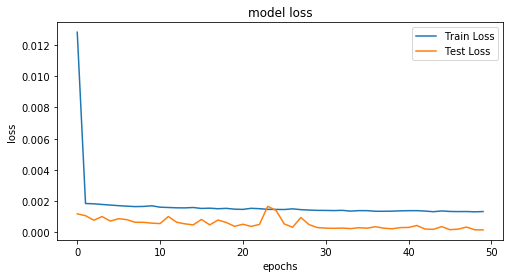

In [62]:
plt.figure(figsize=(8,4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(loc='upper right')
plt.show();

In [63]:
testScore = sqrt(mean_squared_error(y_pred,y_test))
print('Test Score: %.2f RMSE' % (testScore))

Test Score: 32.13 RMSE
